# Reducing connections

In this workbook I am working on reducing the data in the process and authentication data for further use in anomaly detection and analysis to place attacks within the kill chain. Through our discussion and analysis of the "Networks" associated with this data we know that within the whole dataset there is a whole variety of different "connections". For the most part when we talk about connections we refer to a more genuine interpretation of the word - a link between a source and destination or a person interacting with a device. For this reason we are mostly going to be focusing on the variables `UserName` and `Device` in the process data, and the `UserName`, `SrcDevice` and `DstDevice` variables in the authentication data.

In previous EDA work (particularly noted with the use of visualisation) we found that there were a large amount of data points with far too many connections to draw any meaningful conclusions/recognise any interesting structural pattern in the connections. These are most easily observed in another way by looking at the scatter plots found in [this folder](https://github.com/Galeforse/Advanced-Cyber-Analytics-for-Attack-Detection/tree/main/Gabriel/EDA/plots), observing those which tower above the others in frequency. When talking to Dan, we thought that it would be worth removing this data, and additionally might want to remove those single path connections (and possibly slightly higher) that occur in the data.

To do this the main aims of this workbook are to analyse these connections through use of counting and then create new reduced data dropping extra values to get a more feasibly usable dataset. This workbook is linked to some brief experimentation that I conducted into the data distribution in the other workbook in this folder [Plotting Boxplots](https://github.com/Galeforse/Advanced-Cyber-Analytics-for-Attack-Detection/blob/main/Gabriel/Anomaly%20Detection%20and%20beyond/Plotting%20Boxplots.ipynb).

We start by importing our modules as usual. To understand what some of what I'm doing here relates to please refer to [Using Modules]().

In [1]:
import sys
sys.path.insert(0,'G:/Users/Gabriel/Documents/Education/UoB/GitHubDesktop/Advanced-Cyber-Analytics-for-Attack-Detection/Modules/')
import pandas as pd
import numpy as np
from dt import *
from startup_g import *
import seaborn as sns

In [2]:
df_p = process_import()
df_a = auth_import()

Looking for local copy of Process data...


G:\Programs\Anaconda\envs\det\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Process data fetched locally in 0:01:09.162751
Looking for local copy of Auth data...
Auth data fetched locally in 0:00:20.999779


In [3]:
df_p.head()

,UserName,Device,ProcessName,ParentProcessName,DailyCount
0,Comp748297$,Comp748297,Proc391839.exe,Proc387473,1
1,Comp563664$,Comp563664,rundll32.exe,services,1
2,User607396,Comp609111,Proc417435.exe,Proc417435,1
3,Comp641702$,Comp641702,Proc249569.exe,services,1
4,Comp157389$,Comp157389,Proc402696.exe,services,1


In [4]:
df_a.head()

,UserName,SrcDevice,DstDevice,Authent Type,Failure,DailyCount
0,User035855,Comp808475,Comp081330,TGS,0,17.0
1,Comp655251$,Comp655251,ActiveDirectory,NetworkLogon,0,350.0
2,User762066,Comp306129,ActiveDirectory,TGS,0,22.0
3,User384215,Comp095190,EnterpriseAppServer,NetworkLogon,0,35.0
4,User043263,Comp883307,Comp384394,TGS,0,2.0


In [5]:
x = ["UserName","Device"]
counts_p = []
for i in x:
    z = df_p.groupby(i).size().sort_values(ascending=False)
    z = pd.DataFrame(z)
    z.reset_index(level=0, inplace=True)
    z.columns = [i,'Count']
    counts_p.append(z)

In [6]:
x = ["UserName","SrcDevice","DstDevice"]
counts_a = []
for i in x:
    z = df_a.groupby(i).size().sort_values(ascending=False)
    z = pd.DataFrame(z)
    z.reset_index(level=0, inplace=True)
    z.columns = [i,'Count']
    counts_a.append(z)

In [21]:
x = ["UserName","Device"]
counts_p_mid_80 = []
counts_p_mid_80_discard = []
for i in x:
    z = df_p.groupby(i).size().sort_values(ascending=False)
    z = pd.DataFrame(z)
    z.reset_index(level=0, inplace=True)
    z.columns = [i,'Count']
    l = len(z)
    l_low = int(l*0.1)
    l_high = int(l*0.9)
    y = z[(z["Count"] <= z["Count"][l_low]) & (z["Count"] >= z["Count"][l_high])]
    x = z[z["Count"] > z["Count"][l_low]]
    v = z[z["Count"] < z["Count"][l_high]]
    counts_p_mid_80.append(y)
    temp = []
    temp.append(x)
    temp.append(v)
    b = pd.concat(temp,axis=0)
    counts_p_mid_80_discard.append(b)

In [164]:
print(len(counts_p_mid_80[0])+len(counts_p_mid_80_discard[0]))

25320


In [170]:
print("Process - UserName - First 5")
print(counts_p_mid_80[0].head())
print("")
print("Process - UserName - Last 5")
print(counts_p_mid_80[0].tail())
print("")
print("Process - Device - First 5")
print(counts_p_mid_80[1].head())
print("")
print("Process - Device - Last 5")
print(counts_p_mid_80[1].tail())

Process - UserName - First 5
         UserName  Count
2532  Comp459452$   4272
2533  Comp819519$   4272
2534   User202994   4272
2535  Comp509630$   4272
2536  Comp416250$   4272

Process - UserName - Last 5
          UserName  Count
22784  Comp324186$    121
22785   User781308    121
22786  Comp748227$    121
22787   User847942    121
22788   User520063    121

Process - Device - First 5
          Device  Count
1347  Comp412116   6584
1348  Comp878158   6584
1349  Comp702752   6584
1350  Comp543700   6582
1351  Comp815841   6582

Process - Device - Last 5
           Device  Count
12124  Comp504154   1092
12125  Comp514047   1090
12126  Comp793786   1089
12127  Comp595745   1089
12128  Comp852830   1087


In [17]:
pun_discard = counts_p_mid_80_discard[0]["UserName"].tolist()
pd_discard = counts_p_mid_80_discard[1]["Device"].tolist()

<AxesSubplot:xlabel='Count'>

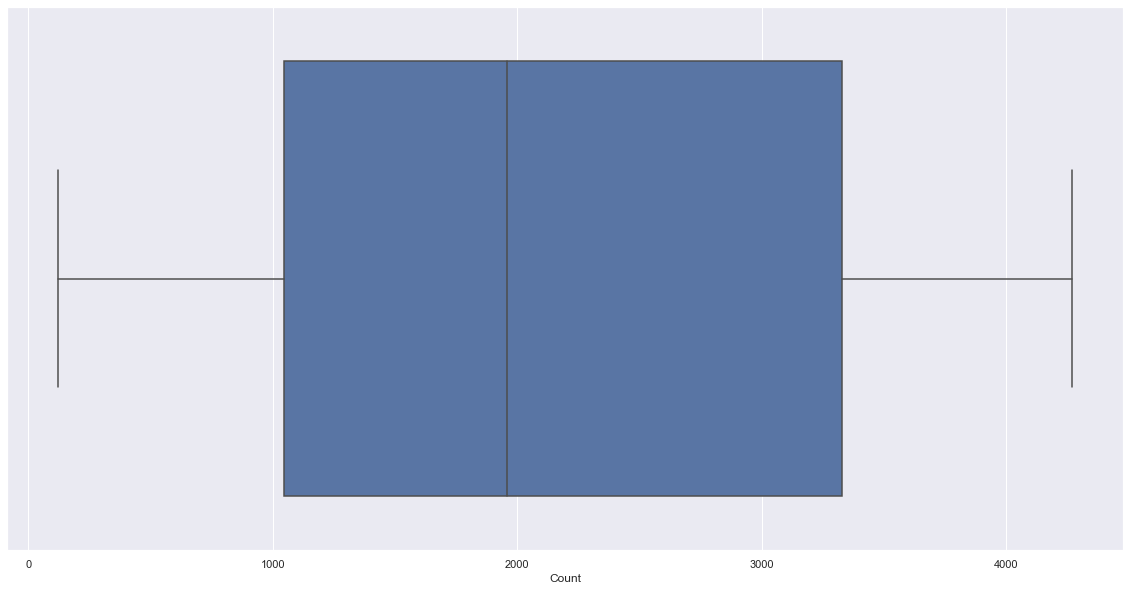

In [18]:
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(x=counts_p_mid_80[0]["Count"])

In [93]:
counts_p_mid_80[0]

Index(['UserName', 'Device', 'ProcessName', 'ParentProcessName', 'DailyCount'], dtype='object')

## Above for Authentication data

In [20]:
x = ["UserName","SrcDevice","DstDevice"]
counts_a_mid_80 = []
counts_a_mid_80_discard = []
for i in x:
    z = df_a.groupby(i).size().sort_values(ascending=False)
    z = pd.DataFrame(z)
    z.reset_index(level=0, inplace=True)
    z.columns = [i,'Count']
    l = len(z)
    l_low = int(l*0.1)
    l_high = int(l*0.9)
    y = z[(z["Count"] <= z["Count"][l_low]) & (z["Count"] >= z["Count"][l_high])]
    x = z[z["Count"] > z["Count"][l_low]]
    v = z[z["Count"] < z["Count"][l_high]]
    counts_a_mid_80.append(y)
    temp = []
    temp.append(x)
    temp.append(v)
    b = pd.concat(temp,axis=0)
    counts_a_mid_80_discard.append(b)

In [22]:
aun_discard = counts_a_mid_80_discard[0]["UserName"].tolist()
asd_discard = counts_a_mid_80_discard[1]["SrcDevice"].tolist()
add_discard = counts_a_mid_80_discard[2]["DstDevice"].tolist()

In [24]:
df_p

,UserName,Device,ProcessName,ParentProcessName,DailyCount
0,Comp748297$,Comp748297,Proc391839.exe,Proc387473,1
1,Comp563664$,Comp563664,rundll32.exe,services,1
2,User607396,Comp609111,Proc417435.exe,Proc417435,1
3,Comp641702$,Comp641702,Proc249569.exe,services,1
4,Comp157389$,Comp157389,Proc402696.exe,services,1
...,...,...,...,...,...
251545,Comp738970$,Comp738970,Proc207472.exe,svchost,2
251546,User925794,Comp097857,cmd.exe,Proc174492,2
251547,Comp996714$,Comp996714,Proc612297.exe,services,5
251548,Comp391736$,Comp391736,rundll32.exe,Proc247259,2


In [34]:
print("Starting length of dataframe: "+str(len(df_p)))
df_p_cut = df_p[~df_p["UserName"].isin(pun_discard)]
print("1st drop length of dataframe: "+str(len(df_p_cut)))
df_p_cut = df_p_cut[~df_p_cut["Device"].isin(pd_discard)]
print("Final length of dataframe: "+str(len(df_p_cut)))

Starting length of dataframe: 55981618
1st drop length of dataframe: 42964407
Final length of dataframe: 38137080


In [36]:
print("Starting length of dataframe: "+str(len(df_a)))
df_a_cut = df_a[~df_a["UserName"].isin(aun_discard)]
print("1st drop length of dataframe: "+str(len(df_a_cut)))
df_a_cut = df_a_cut[~df_a_cut["SrcDevice"].isin(asd_discard)]
print("2nd drop length of dataframe: "+str(len(df_a_cut)))
df_a_cut = df_a_cut[~df_a_cut["DstDevice"].isin(add_discard)]
print("Final length of dataframe: "+str(len(df_a_cut)))

Starting length of dataframe: 15953681
1st drop length of dataframe: 10422898
2nd drop length of dataframe: 8007794
Final length of dataframe: 851237
